In [18]:
%pylab inline
import sklearn.feature_extraction.image
import sklearn.metrics
import os
import pyprind
#climate.enable_default_logging()
import glob
from scipy.ndimage.filters import median_filter
import datetime
import skimage.feature
import skimage.filter.rank
from skimage.morphology import disk
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

Populating the interactive namespace from numpy and matplotlib


In [3]:
from IPython import display

In [4]:
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

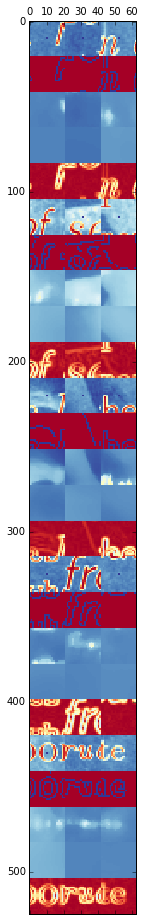

In [48]:
patch_size = 21
patch_center = patch_size / 2
max_patches = 500
n_images = 10

all_images = [int(filter(char.isdigit, image)) for image in glob.glob("train/*.png")]
#all_train_images = [i for i in all_images if i % 6]
#all_valid_images = [i for i in all_images if not i % 6]
all_train_images = all_images
all_valid_images = all_images

def enlargen_image(image):
    enlargened_size = (image.shape[0] + patch_center*2, image.shape[1] + patch_center*2)
    enlargened_image = np.zeros(enlargened_size, dtype=np.float32)
    enlargened_image[patch_center:-patch_center, patch_center:-patch_center] = image
    return enlargened_image

def batch(mode):
    if mode == 'train':
        images = np.random.choice(all_train_images, n_images)
    else:
        images = np.random.choice(all_valid_images, n_images)

    X_patches = np.zeros((0, patch_size*5, patch_size))
    y_patches = np.zeros((0, patch_size, patch_size))

    for image in images:
        X_image = imread('train/%d.png' % image)
        y_image = imread('train_cleaned/%d.png' % image)

        enlargened_X = enlargen_image(X_image)
        X_canny = skimage.feature.canny(enlargened_X).astype(np.float32)
        X_med5 = skimage.filter.rank.median(enlargened_X, disk(5)) / 255.0
        X_med25 = skimage.filter.rank.median(enlargened_X, disk(25)) / 255.0
        X_sobel = skimage.filter.sobel(enlargened_X)
        features = [enlargened_X, X_canny, X_med5, X_med25, X_sobel]
        enlargened_y = enlargen_image(y_image)

        def patchify(img):
            return sklearn.feature_extraction.image.extract_patches_2d(
                img, 
                (patch_size, patch_size), 
                max_patches=max_patches,
                random_state=rand_seed)
        rand_seed = np.random.randint(0, 1000000)

        X_ps = [patchify(feature) for feature in features]
        X_concatpatches = np.concatenate(X_ps, axis=1)

        X_patches = np.concatenate([X_patches, X_concatpatches])
        y_p = sklearn.feature_extraction.image.extract_patches_2d(
            enlargened_y,
            (patch_size, patch_size), 
            max_patches=max_patches,
            random_state=rand_seed)
        y_patches = np.concatenate([y_patches, y_p])

    y_cls = y_patches[:, patch_center, patch_center]
    X_patches = X_patches[:, newaxis, :, :]

    return X_patches, y_cls
def train_batch():
    return batch('train')
def valid_batch():
    return batch('valid')
def view_batch():
    xs, ys = train_batch()
    choices = np.random.choice(xs.shape[0], 3)
    ximgs = xs[choices, 0]
    ximgs[:, patch_size/2, patch_size/2] = ys.flatten()[choices]
    return np.concatenate(ximgs, axis=1)
#xs, ys = train_batch()
matshow(np.concatenate([view_batch() for _ in range(5)]), cmap='RdYlBu')

In [47]:
mode = 'train'
if mode == 'train':
    images = np.random.choice(all_train_images, n_images)
else:
    images = np.random.choice(all_valid_images, n_images)

X_patches = np.zeros((0, patch_size*5, patch_size))
y_patches = np.zeros((0, patch_size, patch_size))

for image in images:
    X_image = imread('train/%d.png' % image)
    y_image = imread('train_cleaned/%d.png' % image)

    enlargened_X = enlargen_image(X_image)
    X_canny = skimage.feature.canny(enlargened_X).astype(np.float32)
    X_med5 = skimage.filter.rank.median(enlargened_X, disk(5)) / 255.0
    X_med25 = skimage.filter.rank.median(enlargened_X, disk(25)) / 255.0
    X_sobel = skimage.filter.sobel(enlargened_X)
    features = [enlargened_X, X_canny, X_med5, X_med25, X_sobel]
    enlargened_y = enlargen_image(y_image)
    
    def patchify(img):
        return sklearn.feature_extraction.image.extract_patches_2d(
            img, 
            (patch_size, patch_size), 
            max_patches=max_patches,
            random_state=rand_seed)
    rand_seed = np.random.randint(0, 1000000)

    X_ps = [patchify(feature) for feature in features]
    X_concatpatches = np.concatenate(X_ps, axis=1)
    
    X_patches = np.concatenate([X_patches, X_concatpatches])
    y_p = sklearn.feature_extraction.image.extract_patches_2d(
        enlargened_y,
        (patch_size, patch_size), 
        max_patches=max_patches,
        random_state=rand_seed)
    y_patches = np.concatenate([y_patches, y_p])

y_cls = y_patches[:, patch_center, patch_center]
X_patches = X_patches[:, newaxis, :, :]


In [45]:
a = np.concatenate(X_ps, axis=1)
a.shape

(500, 105, 21)

<matplotlib.colorbar.Colorbar instance at 0x7f557d7a56c8>

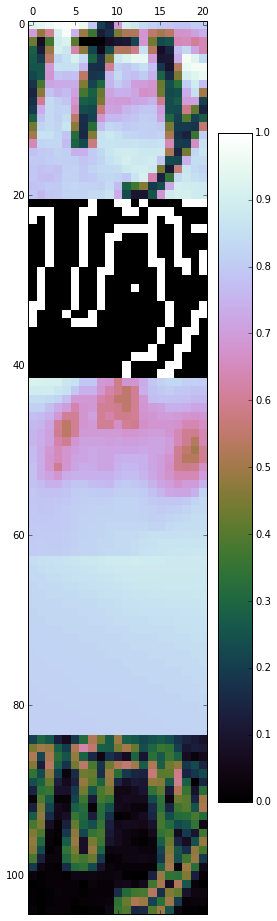

In [44]:
matshow(a[0], cmap='cubehelix')
colorbar()